In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
# read in the merged csv

f = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/merged.csv')

In [28]:
# check out the first 25 rows; every 25 rows is a new patient

f[:25]

,patdeid,VISIT,medication,total_dose,admin_location,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene
0,1,0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,2.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,5,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0
6,1,6,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,1,7,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,8,2.0,32.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,1,9,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


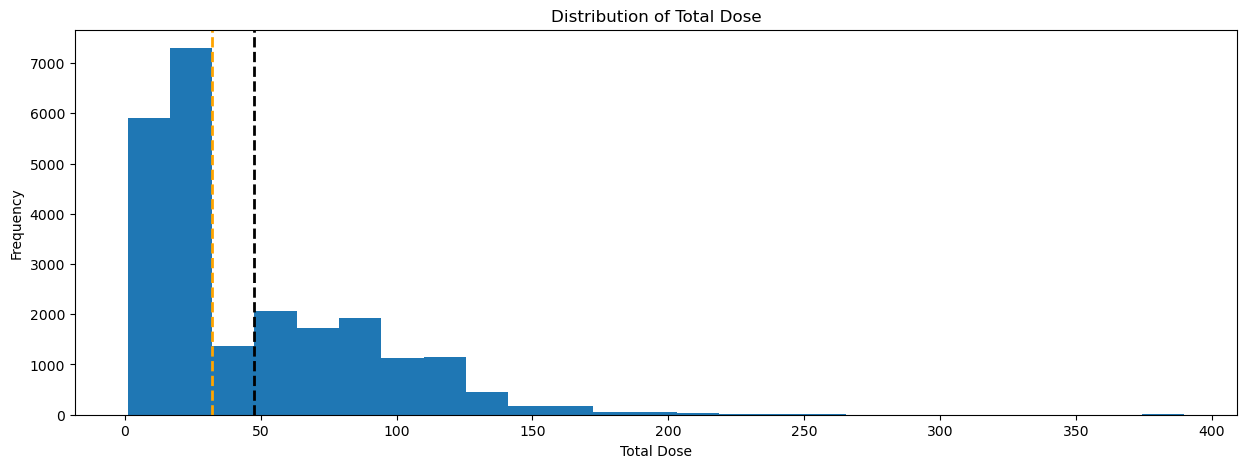

In [29]:
# review distribution of total dose

plt.figure(figsize=(15,5))
f.total_dose.plot(kind='hist', bins=25)
plt.title('Distribution of Total Dose')
plt.xlabel('Total Dose')
plt.ylabel('Frequency')
plt.axvline(f.total_dose.mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(f.total_dose.median(), color='orange', linestyle='dashed', linewidth=2)
plt.show()





Before we do anything else, we must create the target variable.  A patient must meet 2 conditions to have reached the desired outcomes, listed as follows:<br>

1.  Complete 24 weeks of treatment (this is validated by looking at the final 4 tests)<br>
2.  Show 4 consecutive clean urine tests for opiates for visits 21 -24

In [30]:
# for rows in 'VISIT' column that equal 21,22,23,24 if 't_Opiate300' is 0, then 1, else 0

f['w_21'] = np.where((f['VISIT']==21) & (f['t_Opiate300']==0), 1, 0)
f['w_22'] = np.where((f['VISIT']==22) & (f['t_Opiate300']==0), 1, 0)
f['w_23'] = np.where((f['VISIT']==23) & (f['t_Opiate300']==0), 1, 0)
f['w_24'] = np.where((f['VISIT']==24) & (f['t_Opiate300']==0), 1, 0)

In [31]:
#create new column 'c_tests' which updates value to 1 for clean tests in each of the last 4 weeks of treatement 

f['c_tests'] = f['w_21'] + f['w_22'] + f['w_23'] + f['w_24']

# change c_tests to float
f['c_tests'] = f['c_tests'].astype(float)

In [32]:
f[:25]

,patdeid,VISIT,medication,total_dose,admin_location,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene,w_21,w_22,w_23,w_24,c_tests
0,1,0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0.0
1,1,1,2.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0.0
2,1,2,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
3,1,3,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
4,1,4,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0.0
5,1,5,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0,0,0,0,0.0
6,1,6,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0.0
7,1,7,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0.0
8,1,8,2.0,32.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0.0
9,1,9,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0.0


In [33]:
# for each unique patient id (patdeid), if sum of c_tests column is equal to 4
# then create new column 'outcome' where the value is 1 else 0

for i in f['patdeid'].unique():
    if f.loc[f['patdeid']==i, 'c_tests'].sum() == 4:
        f.loc[(f['patdeid']==i)&(f['VISIT']==24), 'outcome'] = 1.0
    else:
        f.loc[(f['patdeid']==i)&(f['VISIT']==24), 'outcome'] = 0.0

# fill the nan values in the outcome column with 0
f.outcome.fillna(0.0, inplace=True)


In [34]:
# find range of values that appear only once - try to bin this column as their are too many weak estimators

f.total_dose.value_counts()[f.total_dose.value_counts() == 1].sort_index()

total_dose
7.0      1
19.0     1
21.0     1
51.0     1
66.0     1
92.0     1
97.0     1
104.0    1
106.0    1
107.0    1
111.0    1
118.0    1
127.0    1
129.0    1
131.0    1
132.0    1
133.0    1
144.0    1
153.0    1
205.0    1
240.0    1
250.0    1
270.0    1
Name: count, dtype: int64

Will need to decide on binning strategy at some point in the future...  

In [35]:
# change columns to float 

for col in f.columns:
    if col.startswith('w_'):
        f[col] = f[col].astype(float)
    

Target variable 'outcome' successfully created<br>
<br>
Next we will need to differentiate between patients that completed 24 weeks of treatment

In [36]:
# create column 'c_t' (completed treatment) 
# for each unique value in patdeid
# if VISIT column contains values in range from 0 to 24, then update value next to visit 24 to 1 else 0

for i in f['patdeid'].unique():
    if f.loc[f['patdeid']==i, 'VISIT'].isin(range(0,25)).all():
        f.loc[(f['patdeid']==i)&(f['VISIT']==24), 'c_t'] = 1.0
    else:
        f.loc[(f['patdeid']==i)&(f['VISIT']==24), 'c_t'] = 0.0

# fill the nan values in the c_t column with 0  
f.c_t.fillna(0.0, inplace=True)

In [37]:
# create function that provides random sample from patdeid column, that takes df as input

def random_sample(df):
    return df.patdeid.sample(1).values[0]

In [38]:
# create snapshot of patient data for 24 week period, validate that target variable is correct

f.loc[f.patdeid==random_sample(f),
['patdeid','VISIT','medication','total_dose','t_Opiate300',
'w_21','w_22','w_23','w_24','c_tests','outcome','c_t']][:25]

,patdeid,VISIT,medication,total_dose,t_Opiate300,w_21,w_22,w_23,w_24,c_tests,outcome,c_t
6007,518,0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6008,518,1,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6009,518,2,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
f.loc[f.c_t==1.0, 'outcome'].value_counts()

outcome
0.0    521
1.0    389
Name: count, dtype: int64

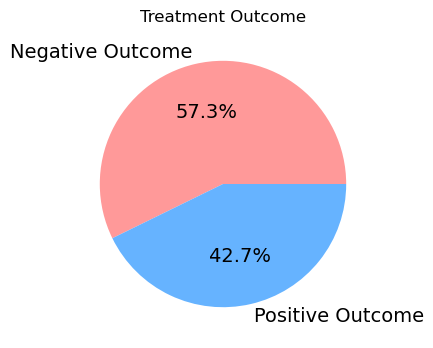

In [40]:
# create pie chart for treatment outcomes

f.loc[f.c_t==1.0, 'outcome'].value_counts().plot(kind='pie',
                                              title='Treatment Outcome',
                                              figsize=(6,4),
                                                autopct='%1.1f%%',
                                                labels=['Negative Outcome','Positive Outcome'],
                                                colors=['#ff9999','#66b3ff'],
                                                textprops={'fontsize': 14}),plt.ylabel('');
                                                

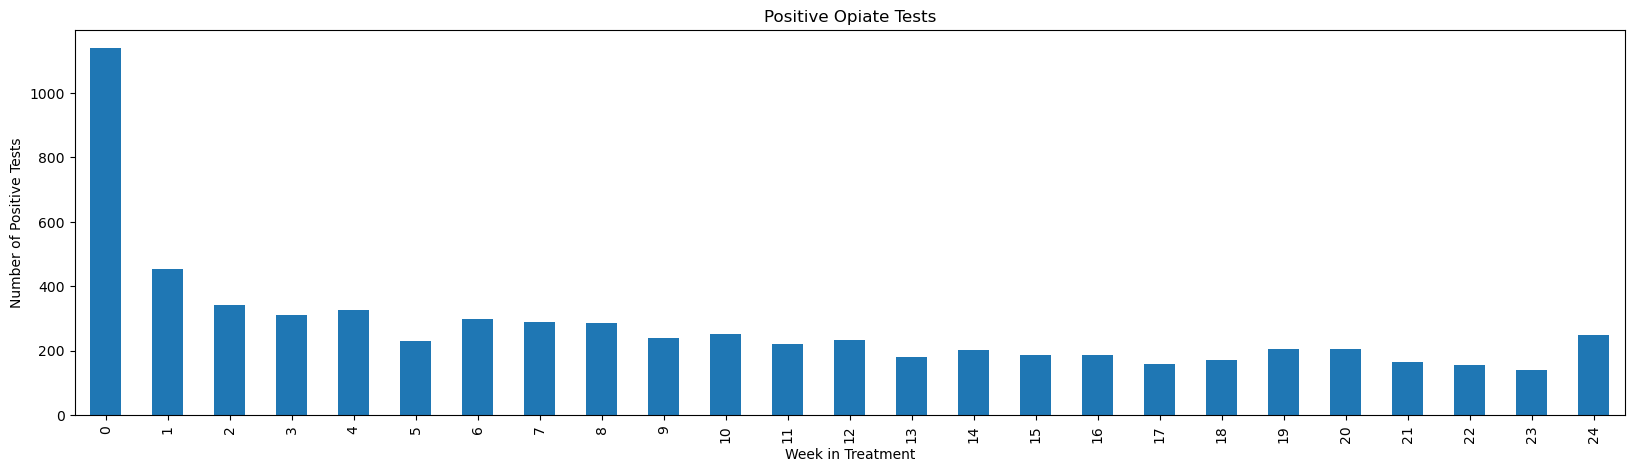

In [41]:
# bar chart for opiate tests for patient population
f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar', 
                                                   figsize=(20,5), 
                                                   legend=False,
                                                   title='Positive Opiate Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests');

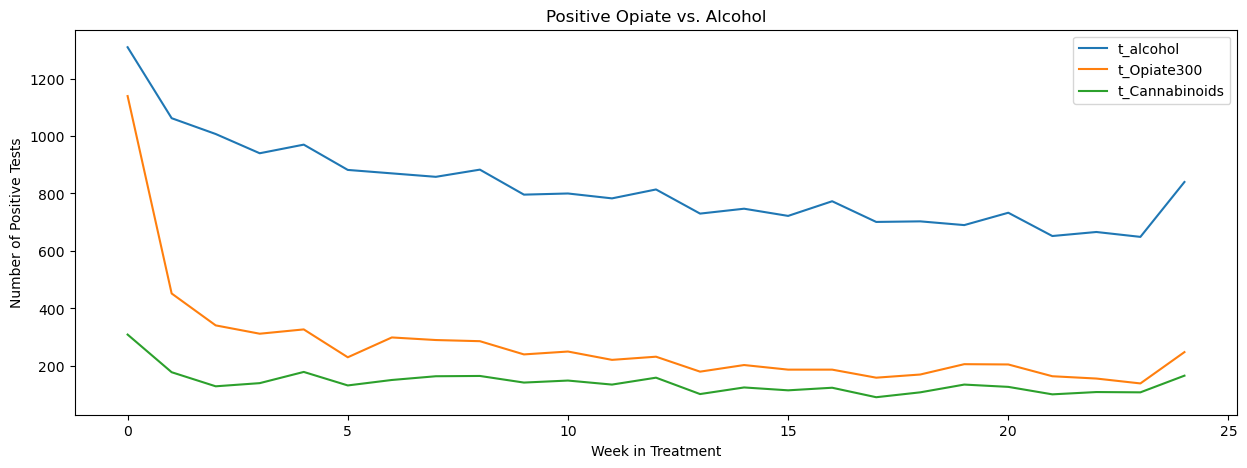

In [42]:
# lineplot comparing other positive tests to opiates

f.groupby('VISIT').agg({'t_alcohol':'sum',
                        't_Opiate300':'sum',
                        't_Cannabinoids':'sum'}).plot(kind='line', 
                                                   figsize=(15,5), 
                                                   legend=True,
                                                   title='Positive Opiate vs. Alcohol', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests');

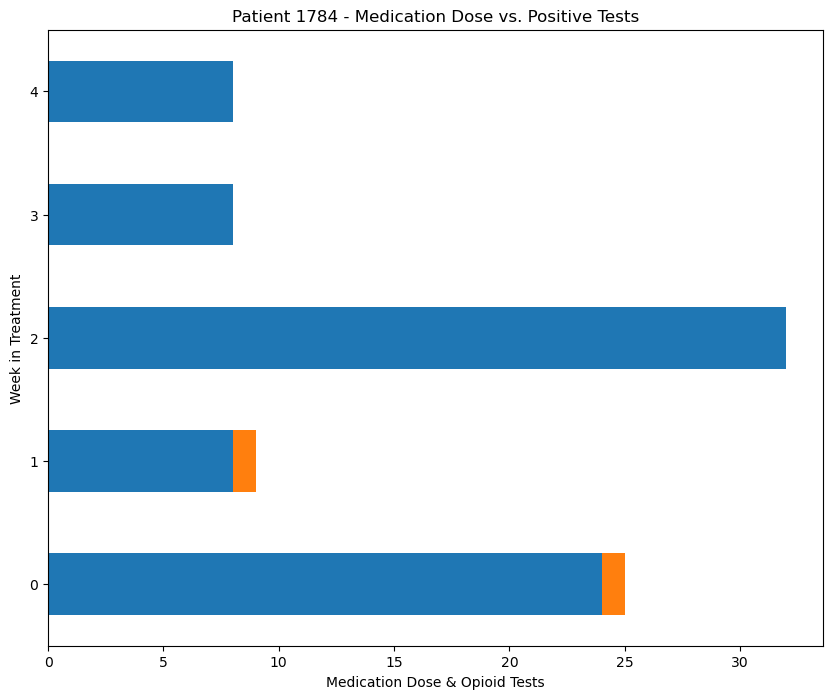

In [43]:
# every time you run this cell, you will get a random patient sample
# this is a snapshot of the patient's data for the 24 week period

f.loc[f.patdeid==random_sample(f)].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, figsize=(10,8),
                                            title=(f'Patient {random_sample(f)} - Medication Dose vs. Positive Tests'),
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment');

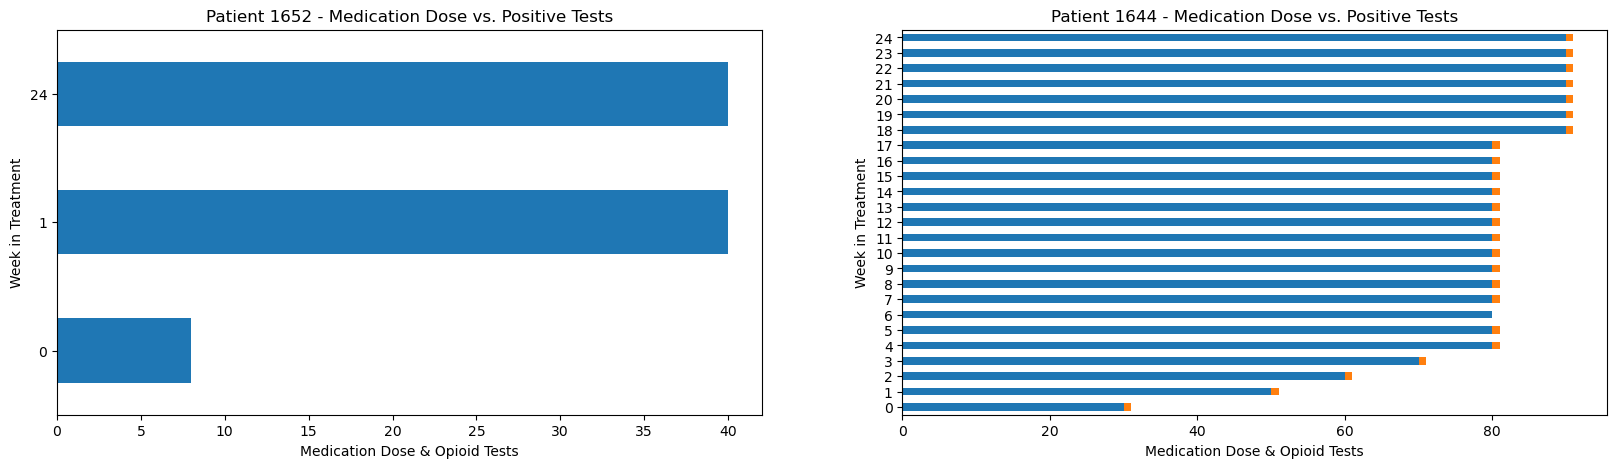

In [44]:
# create 2 plots next to eachother

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

# Patient 1
f.loc[f.patdeid==random_sample(f)].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, 
                                            title=(f'Patient {random_sample(f)} - Medication Dose vs. Positive Tests'),
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment',ax=ax1);

# Patient 2                                                
f.loc[f.patdeid==random_sample(f)].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, 
                                            title=(f'Patient {random_sample(f)} - Medication Dose vs. Positive Tests'),
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment',ax=ax2);



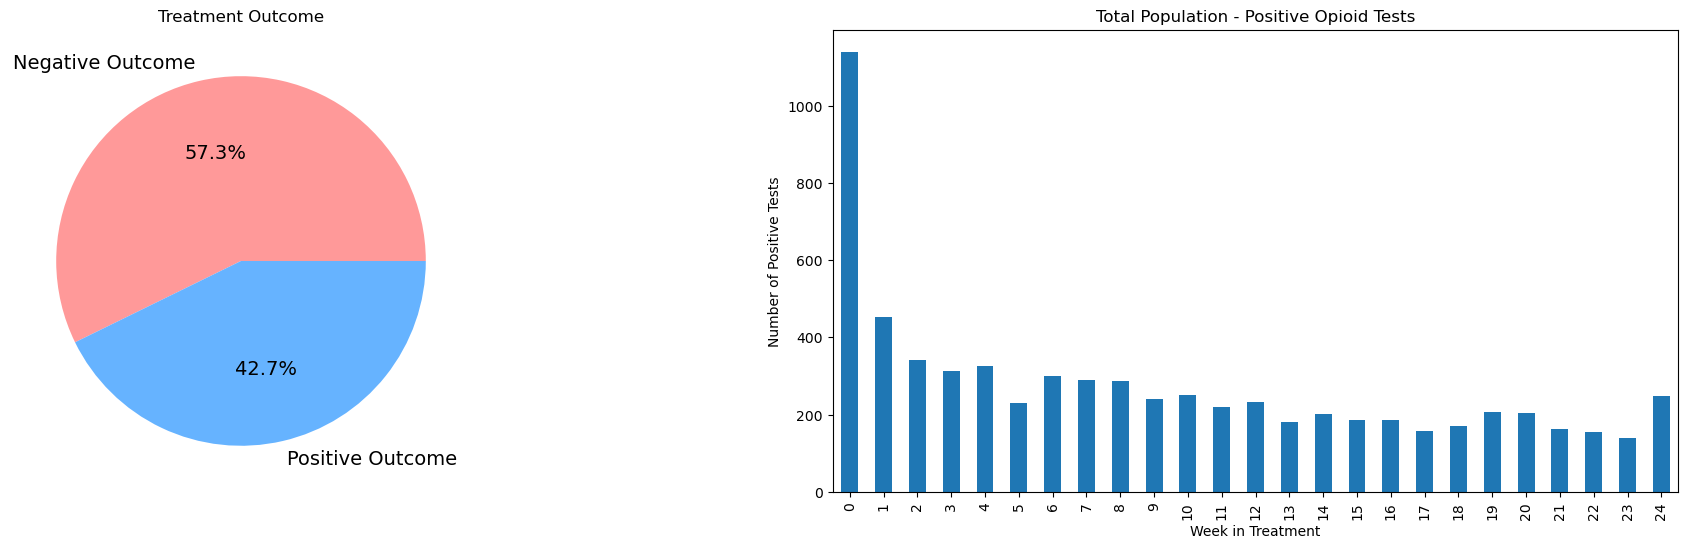

In [45]:
# plot 2 plots next to eachother

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,6))

# remove count from legend align to center

f.loc[f.c_t==1.0].outcome.value_counts().plot(kind='pie',
                                                title='Treatment Outcome',
                                                autopct='%1.1f%%',
                                                ylabel='',
                                                labels=['Negative Outcome','Positive Outcome'],
                                                colors=['#ff9999','#66b3ff'],
                                                textprops={'fontsize': 14},
                                                ax=ax1);



# plot lineplot for positive opiate tests for patients who completed treatment

f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar',  
                                                   legend=False,
                                                   title='Total Population - Positive Opioid Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests',
                                                   ax=ax2);


In [46]:
# save to csv for next step, one hot encoding

f.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/fe.csv', index=False)